<a href="https://colab.research.google.com/github/shivanipoosala/BOOT_CAMP-AIML/blob/main/DAY_5_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
d=pd.read_csv('/content/EmissionsData.csv')
print(d)

    SNO  ENGINESIZE  CO2EMISSIONS
0     0         2.0         196.0
1     1         2.4         221.0
2     2         1.5         136.0
3     3         3.5         255.0
4     4         3.5         244.0
5     5         3.5         230.0
6     6         3.5         232.0
7     7         3.7         232.0
8     8         3.7         255.0
9     9         2.4         267.0
10   10         3.5           NaN
11   11         2.5           NaN
12   12         NaN         269.0
13   13         2.6         270.0


In [ ]:
d.head()

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


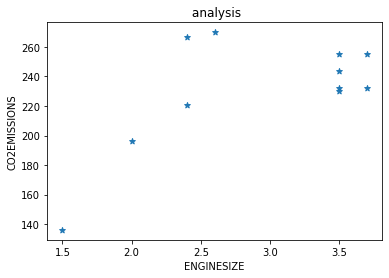

In [ ]:
#step2
#visualize dataset
import matplotlib.pyplot as plt
plt.scatter(d.ENGINESIZE,d.CO2EMISSIONS,marker='*')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title(" analysis")
plt.show()

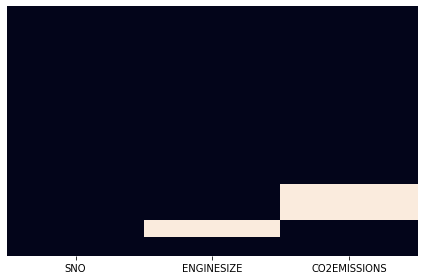

In [ ]:
#seaborn
import seaborn as sns
def heatmap(d):
  plt.figure(figsize=(6,4))
  sns.heatmap(d.isnull(),yticklabels=False,cbar=False)
  plt.tight_layout()
  return plt.show()
heatmap(d)

In [ ]:
#step 4
#preprocessing the dataset
#method  drop the roes with NaN values
'''d=d.dropna()
d.head()'''
import math
median_ENGINESIZE=math.floor(d.ENGINESIZE.median())
print(median_ENGINESIZE)
d.ENGINESIZE=d.ENGINESIZE.fillna(median_ENGINESIZE)

3


In [ ]:
mean_CO2EMISSIONS=math.floor(d.CO2EMISSIONS.mean())
mean_CO2EMISSIONS


233

In [ ]:
d.CO2EMISSIONS=d.CO2EMISSIONS.fillna(mean_CO2EMISSIONS)

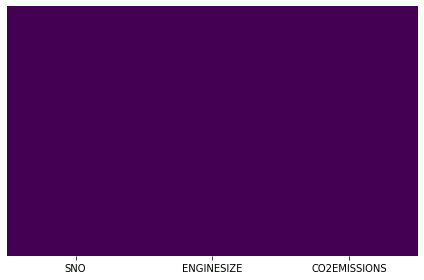

In [ ]:
#seaborn
import seaborn as sns
def get_heatmap(d):
  plt.figure(figsize=(6,4))
  sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()
get_heatmap(d)

In [ ]:
#step4
x=d.iloc[0:,-2:-1].values
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3. ],
       [2.6]])

In [ ]:
y=d.iloc[:,-1:].values
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [233.],
       [233.],
       [269.],
       [270.]])

In [ ]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

array([[2.5],
       [1.5],
       [2.6],
       [2.4],
       [2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [3. ]])

In [ ]:
y_train

array([[233.],
       [136.],
       [270.],
       [267.],
       [221.],
       [232.],
       [233.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [ ]:
x_test

array([[3.7],
       [3.5],
       [3.5]])

In [ ]:
y_test

array([[255.],
       [232.],
       [244.]])

In [ ]:
#Training model -fitting the algorith
from sklearn.linear_model import  LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:

y_pred=model.predict(x_test)
y_pred

array([[259.68622904],
       [253.45754549],
       [253.45754549]])

In [ ]:
y_test

array([[255.],
       [232.],
       [244.]])

In [ ]:
#step 7
print("predicted valueof training data:",model.score(x_train,y_train))
print("predicted valueof testing data:",model.score(x_test,y_test))

predicted valueof training data: 0.325265263742891
predicted valueof testing data: -1.1605749404872192


In [ ]:
train_accuracy=model.score(x_train,y_train)*100
print("Training Accuracy of ML model",train_accuracy)
test_accuracy=model.score(x_test,y_test)*100
print("Testing Accuracy of ML model",test_accuracy)

Training Accuracy of ML model 32.5265263742891
Testing Accuracy of ML model -116.05749404872192


In [ ]:
accuracy=model.score(x,y)*100
print("overall accuracy of ML model",accuracy)

overall accuracy of ML model 31.631486410905186


In [ ]:
model.coef_

array([[31.14341777]])

In [ ]:
model.intercept_

array([144.4555833])

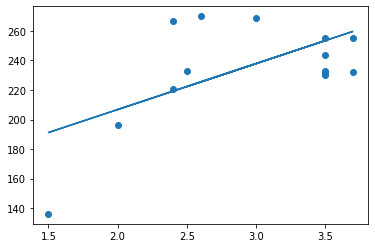

In [ ]:
#step8:
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

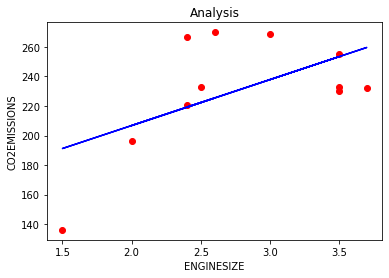

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Analysis")
plt.show()

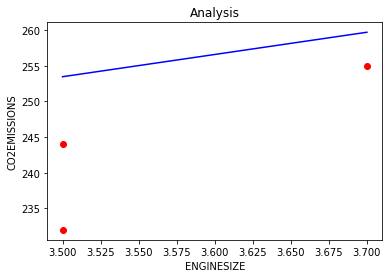

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Analysis")
plt.show()